In [157]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import os

In [158]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [159]:
print("Working Path Directory:", os.path)

Working Path Directory: <module 'ntpath' from 'c:\\Users\\Tober\\anaconda3\\lib\\ntpath.py'>


In [160]:
import cv2
import imghdr


In [161]:
dataDir = 'data'
img_exts = ['jpeg','jpg','bmp','png']


In [162]:
os.listdir(dataDir)

['daVinci', 'gustavK', 'vanGough', 'piccaso', 'reneM', 'dali', 'monet']

Listing directory for van gough data and dali data | Next is cleaning the data

In [163]:
# img = cv2.imread(os.path.join(dataDir, vgData, 'image111.jpg'))

In [164]:
# plt.imshow(img)

In [165]:
for image_class in os.listdir(dataDir): 
  for image in os.listdir(os.path.join(dataDir, image_class)):
        imagePath = os.path.join(dataDir, image_class, image)
        try: 
            cv2.resize(image, (254,254,3))
            img = cv2.imread(imagePath)
            tip = imghdr.what(imagePath)
            if tip not in img_exts:
              print("Image not in extension list {}".format(imagePath))
              os.remove(imagePath)
        except Exception as e:
          print('Issue with image {}'.format(imagePath))


Issue with image data\daVinci\image.jpg
Issue with image data\daVinci\image2.jpg
Issue with image data\daVinci\image3.jpg
Issue with image data\daVinci\image4.jpg
Issue with image data\daVinci\image5.jpg
Issue with image data\daVinci\image6.jpg
Issue with image data\daVinci\image7.jpg
Issue with image data\daVinci\image8.jpg
Issue with image data\daVinci\image9.jpg
Issue with image data\daVinci\image10.jpg
Issue with image data\daVinci\image11.jpg
Issue with image data\daVinci\image12.jpg
Issue with image data\daVinci\image13.jpg
Issue with image data\daVinci\image14.jpg
Issue with image data\daVinci\image15.jpg
Issue with image data\daVinci\image16.jpg
Issue with image data\daVinci\image17.jpg
Issue with image data\daVinci\image18.jpg
Issue with image data\daVinci\image19.jpg
Issue with image data\daVinci\image20.jpg
Issue with image data\daVinci\image21.jpg
Issue with image data\daVinci\image22.jpg
Issue with image data\daVinci\image23.jpg
Issue with image data\daVinci\image24.jpg
Is

ImageClass essentially is the pointer in directory for the folders and data 
Image is the actual image file

Loading in the data

In [166]:
import numpy as np
from matplotlib import pyplot as plt

loading dataset using keras utility, creates batchsize of 32 and resizes
images as well

In [167]:
data = tf.keras.utils.image_dataset_from_directory(dataDir, image_size=(254,254), shuffle=True, batch_size=32)

Found 1785 files belonging to 7 classes.


accessing the datapipeline itself to grab next batch 

In [168]:
# batch[1]
# # Dali = 0
# # VG = 1

initial array element is image with second being the labels

In [169]:
# fix, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

#3 Preprocessing image data

3.1 Scaling Data: Division by 255 - batch[0] / 255

In [170]:
data = data.map(lambda x,y: (x/255, y))

using lamba function to scale dat, y would be the labels. 
gets data x and scales it by 255

In [171]:
scaled_iterator = data.as_numpy_iterator()

In [172]:
batch = scaled_iterator.next()

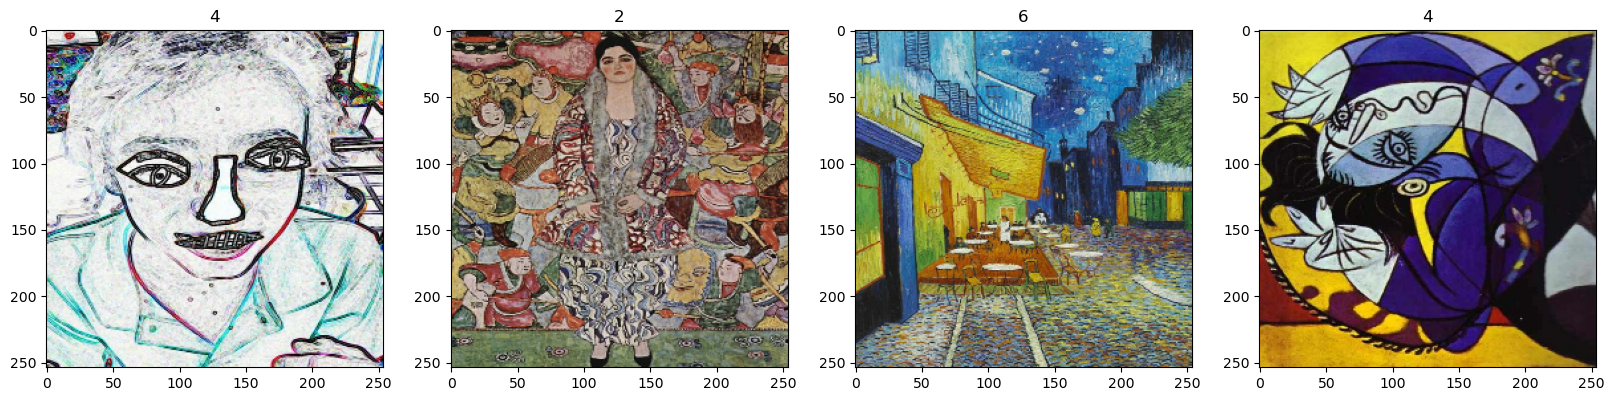

In [173]:
fix, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(batch[1][idx])

3.2 Split Data

In [174]:
len(data)

56

In [175]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

# (train_images, train_labels), (test_images, test_labels) = data.load_data()

train data batch of 42
validation data batch 12
test data batch 6

In [176]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 4 Deep Learning Build

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [178]:
model = Sequential()

In [179]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(254,254,3)))
model.add(MaxPooling2D())
# MaxPool condesing wach 2x2 patch and taking max value
model.add(Dropout(0.2))

model.add(Conv2D(128,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(64,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(32,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(16,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))


filter of 16  with a size of 3x3 pixels with a stride of 1

In [180]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [181]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 252, 252, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 124, 124, 128)     36992     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 62, 62, 128)      

# 3.1 Training the actual model

In [182]:
logdir = 'logs'

In [183]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [184]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
39/39 [==============================] - 106s 3s/step - loss: 1.8898 - accuracy: 0.1851 - val_loss: 1.8854 - val_accuracy: 0.1960
Epoch 2/30
39/39 [==============================] - 101s 3s/step - loss: 1.7937 - accuracy: 0.2668 - val_loss: 1.6437 - val_accuracy: 0.4176
Epoch 3/30
39/39 [==============================] - 99s 3s/step - loss: 1.5471 - accuracy: 0.4231 - val_loss: 1.4620 - val_accuracy: 0.4744
Epoch 4/30
39/39 [==============================] - 99s 3s/step - loss: 1.4367 - accuracy: 0.4663 - val_loss: 1.4623 - val_accuracy: 0.4716
Epoch 5/30
39/39 [==============================] - 100s 3s/step - loss: 1.3495 - accuracy: 0.5048 - val_loss: 1.4397 - val_accuracy: 0.4545
Epoch 6/30
39/39 [==============================] - 111s 3s/step - loss: 1.3239 - accuracy: 0.5064 - val_loss: 1.4061 - val_accuracy: 0.4744
Epoch 7/30
39/39 [==============================] - 122s 3s/step - loss: 1.1964 - accuracy: 0.5585 - val_loss: 1.2239 - val_accuracy: 0.5767
Epoch 8/30
39/3

#3.2 History


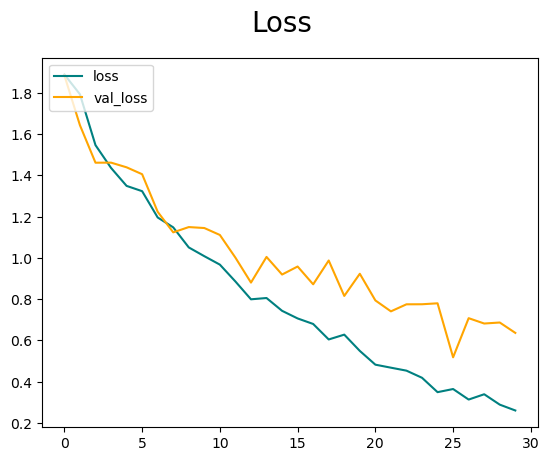

In [185]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

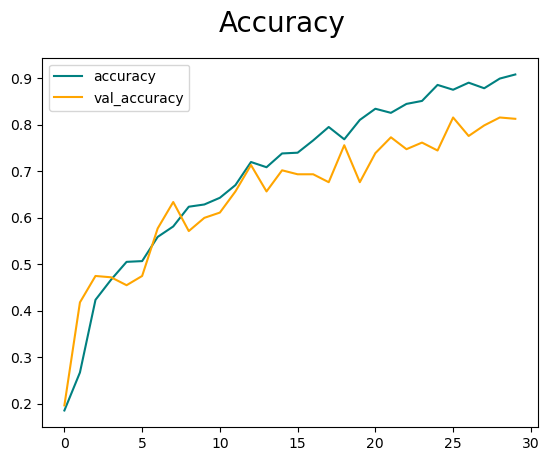

In [186]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#4 Evaluation

In [187]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [188]:
model.evaluate(test)

5/5 [==============================] - 6s 624ms/step - loss: 0.6553 - accuracy: 0.7625


[0.6552751660346985, 0.762499988079071]

In [189]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [190]:
# for batch in test.as_numpy_iterator():
#   X,y = batch
#   yhat = model.predict(X)
#   pre.update_state(y, yhat)
#   re.update_state(y, yhat)
#   acc.update_state(y, yhat)

In [191]:
# print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# 5.1 Testing

In [192]:
# import cv2

In [193]:
# img = cv2.imread('daliTest.jpeg')
# img2 = cv2.imread('monet.jpeg')
# plt.imshow(img2)
# plt.show()

In [194]:
# resize = tf.image.resize(img, (256, 256))
# resize2 = tf.image.resize(img2, (256, 256))

In [195]:
# np.expand_dims(resize2, 0).shape

In [196]:
# yhat = model.predict(np.expand_dims(resize/255, 0))
# yhat